# **Exploratory Data Analysis**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from google.colab import files
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import re
import itertools
import string
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#reading the dataset
mbti_df = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
#shape of dataset
mbti_df.shape

(8675, 2)

In [ ]:
#columns and datatypes
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
#checking null values
mbti_df.isna().sum()

type     0
posts    0
dtype: int64

In [ ]:
#checking duplicate values
mbti_df.duplicated().sum()

0

In [ ]:
#checking unique values
mbti_df.nunique()

type       16
posts    8675
dtype: int64

In [ ]:
#label distribution
mbti_df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

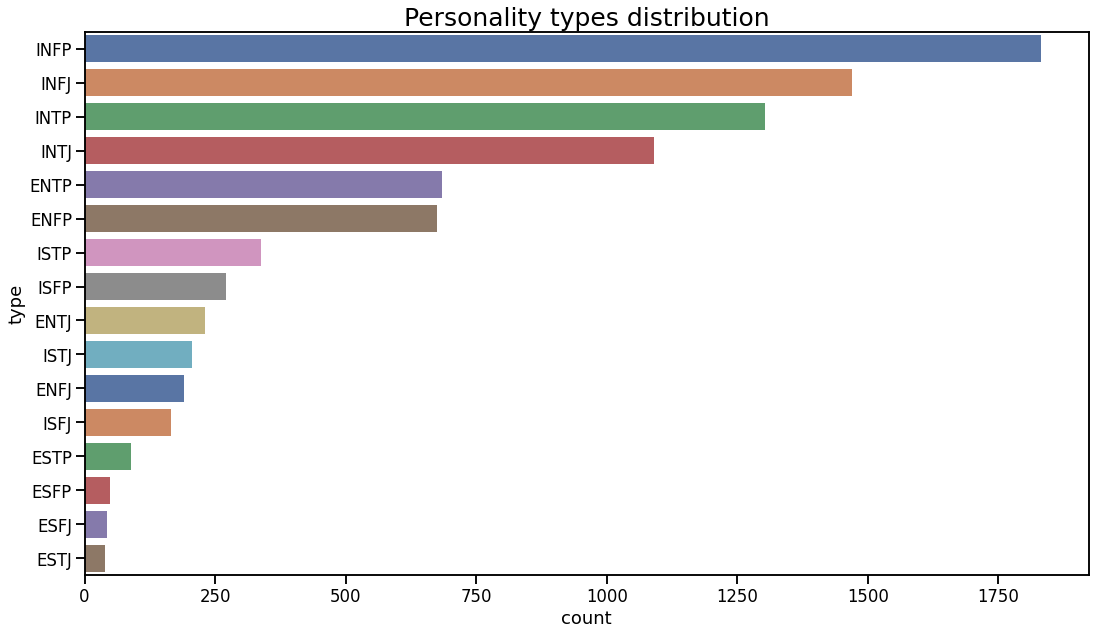

In [ ]:
#visualizing label distribution
plt.figure(figsize=(18,10))
sns.countplot(y='type',data=mbti_df, order=mbti_df.type.value_counts().index, palette="deep")
sns.set_context('talk')
plt.title('Personality types distribution', fontsize=25)
plt.savefig('mbti_type_count.png')
files.download("mbti_type_count.png")
plt.show()

In [ ]:
#length of posts for each personality type
def var_row(row):
    lst = []
    for word in row.split('|||'):
        lst.append(len(word.split()))
    return np.var(lst)

mbti_df['words_per_comment'] = mbti_df['posts'].apply(lambda x: len(x.split())/50)
mbti_df['variance_of_word_counts'] = mbti_df['posts'].apply(lambda x: var_row(x))
mbti_df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

47.1% of the points cannot be placed; you may w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

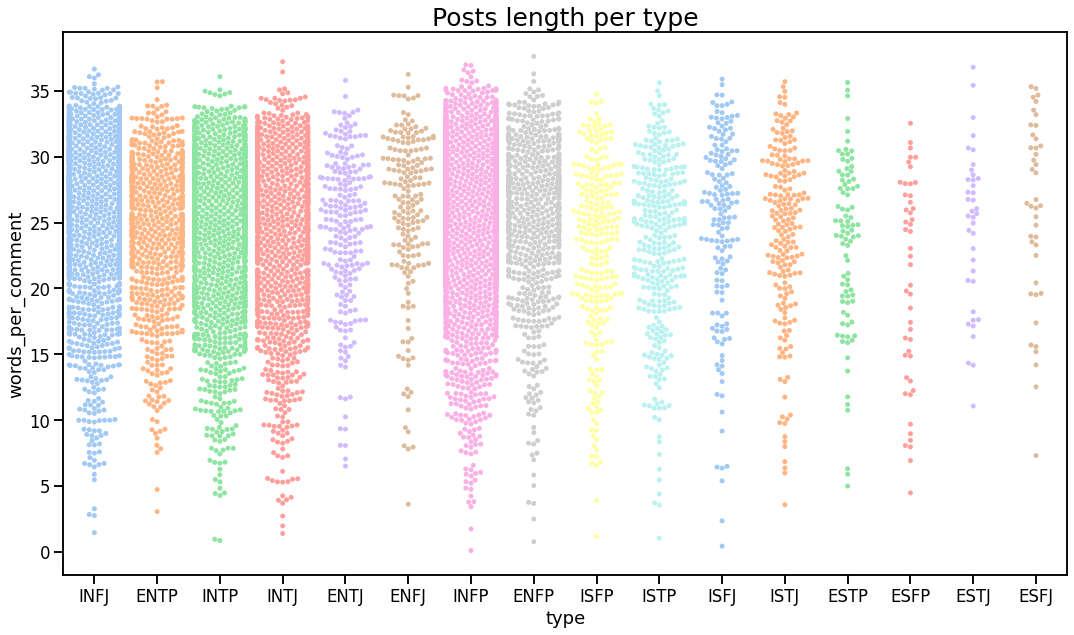

In [ ]:
#plot for posts length per type
plt.figure(figsize=(18,10))
sns.swarmplot('type', 'words_per_comment', data=mbti_df, palette="pastel")
sns.set_context('talk')
plt.title('Posts length per type', fontsize=25)
plt.savefig('mbti_posts_length.png')
files.download("mbti_posts_length.png")
plt.show()

In [ ]:
mbti_df.describe().T

,count,mean,std,min,25%,50%,75%,max
words_per_comment,8675.0,24.524830,6.224211,0.08,20.9300,25.56,29.140000,37.62
variance_of_word_counts,8675.0,137.209864,48.285206,0.00,105.4818,140.33,170.478384,313.29


In [ ]:
mbti_df.corr()

,words_per_comment,variance_of_word_counts
words_per_comment,1.000000,-0.497158
variance_of_word_counts,-0.497158,1.000000


In [ ]:
#pie chart for all personality types
cnt = mbti_df.groupby(['type'])['posts'].count()
pie = go.Pie(labels=cnt.index, values=cnt.values)
fig = go.Figure(data=[pie])
py.iplot(fig)

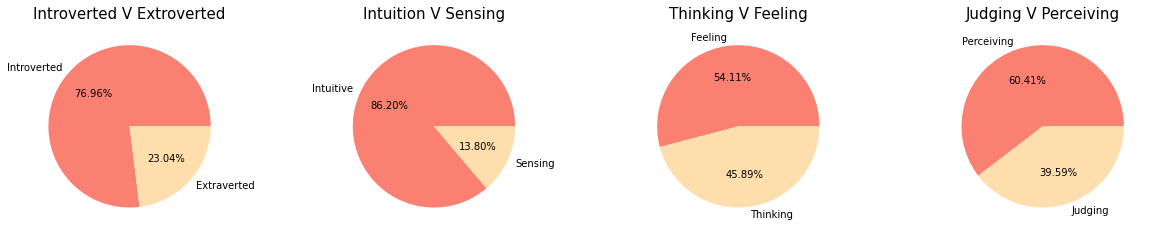

In [ ]:
#plotting individual personality types to check for class imbalance
IE = mbti_df['type'].apply(lambda x: 'Introverted' if x[0] == 'I' else 'Extraverted')
NS = mbti_df['type'].apply(lambda x: 'Sensing' if x[1] == 'S' else 'Intuitive')
TF = mbti_df['type'].apply(lambda x: 'Feeling' if x[2] == 'F' else 'Thinking')
JP = mbti_df['type'].apply(lambda x: 'Perceiving' if x[3] == 'P' else 'Judging')

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(1, 4, 1)
plt.pie(IE.value_counts(), labels = IE.value_counts().index, autopct='%.2f%%', colors = ['salmon','navajowhite'])
ax1.set_title('Introverted V Extroverted', fontsize=15)

ax2 = plt.subplot(1, 4, 2)
plt.pie(NS.value_counts(), labels = NS.value_counts().index, autopct='%.2f%%', colors = ['salmon','navajowhite'])
ax2.set_title('Intuition V Sensing', fontsize=15)

ax3 = plt.subplot(1, 4, 3)
plt.pie(TF.value_counts(), labels = TF.value_counts().index, autopct='%.2f%%', colors = ['salmon','navajowhite'])
ax3.set_title('Thinking V Feeling', fontsize=15)

ax4 = plt.subplot(1, 4, 4)
plt.pie(JP.value_counts(), labels = JP.value_counts().index, autopct='%.2f%%', colors = ['salmon','navajowhite'])
ax4.set_title('Judging V Perceiving', fontsize=15)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

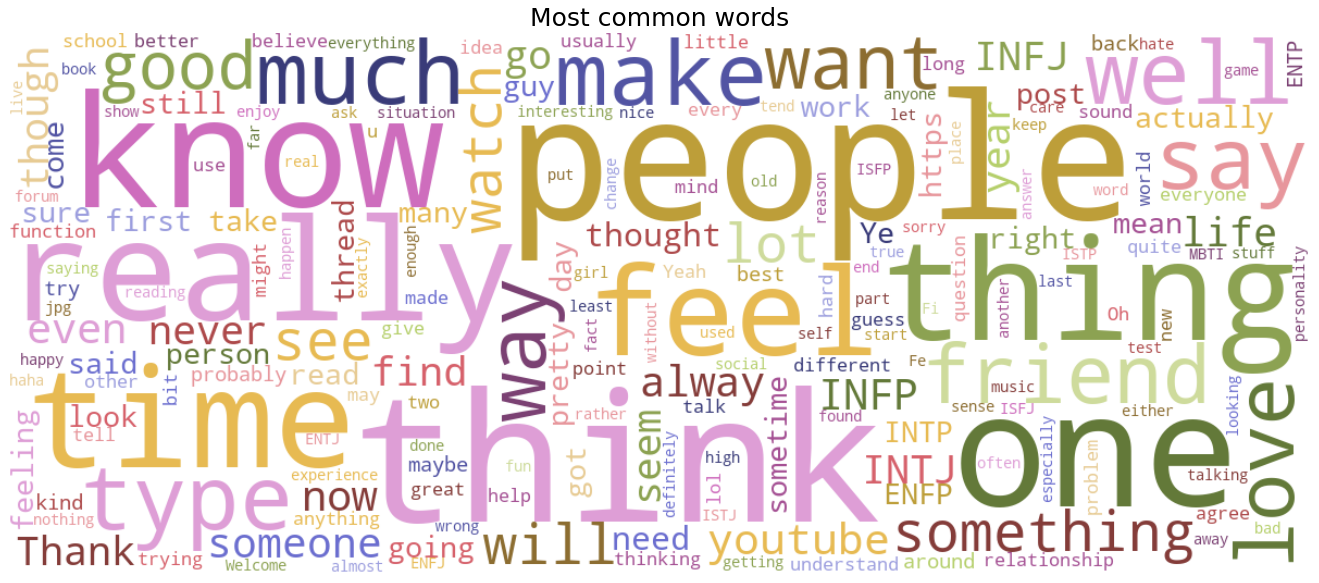

In [ ]:
#plotting WordCloud of most common words in all posts
#most common words in all posts
words = list(mbti_df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc =WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

#collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
sns.set_context('talk')
plt.title('Most common words', fontsize=25)
plt.savefig('mbti_cloud.png')
files.download("mbti_cloud.png") 
plt.show()

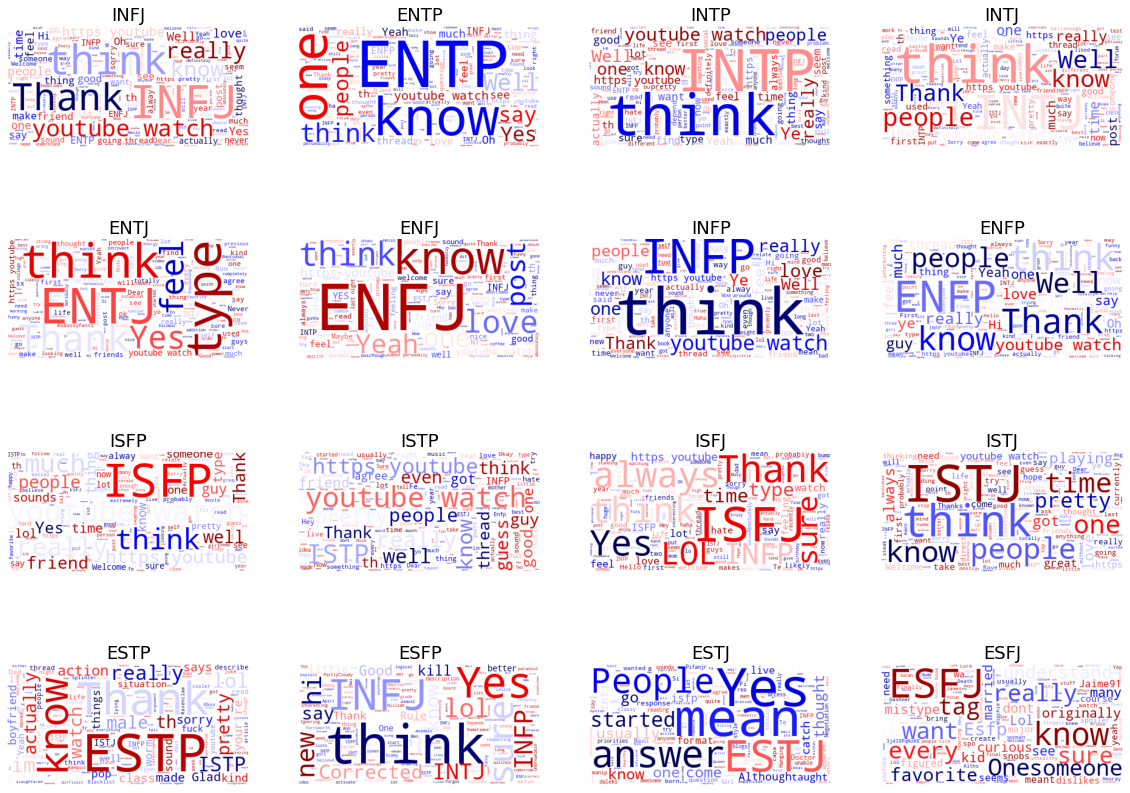

In [ ]:
#wordcloud for all individual personality types
labels = mbti_df['type'].unique()
row, col = 4, 4
wc = WordCloud(colormap="seismic", stopwords=STOPWORDS,  background_color="white")

fig, ax = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        cur_type = labels[i*col+j]
        cur_ax = ax[i][j]
        df = mbti_df[mbti_df['type'] == cur_type]
        wordcloud = wc.generate(df['posts'].to_string())
        cur_ax.imshow(wordcloud)
        cur_ax.axis('off')
        cur_ax.set_title(cur_type)

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Data Preprosessing/Data Cleaning**

In [13]:
#function to clean the posts column
def data_preprocess(df, remove_special=True):
    
    stop = stopwords.words('english')
    #remove urls 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #remove punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #convert to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
    
    #remove stop words
    df['posts'] = df['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #remove MBTI personality types
    if remove_special:
        mbti_pers_list = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        mbti_pers_list = [p.lower() for p in mbti_pers_list]
        pattern = re.compile(r'\b({})\b'.format('|'.join(mbti_pers_list)))
    df["posts"] = df["posts"].apply(lambda x: re.sub('\s+', ' ', re.sub(pattern, '', x)))
    
    return df

mbti_df_clean = data_preprocess(mbti_df)

In [ ]:
mbti_df_clean.head()

,type,posts
0,INFJ,moments sportscenter plays pranks lifechangin...
1,ENTP,finding lack posts alarming boring position of...
2,INTP,good course know thats blessing curse absolute...
3,INTJ,dear enjoyed conversation esoteric gabbing nat...
4,ENTJ,youre fired thats another silly misconception ...


# **Feature Engineering**

In [ ]:
#transforming posts into a sparse matrix of n-gram counts
cntizer = CountVectorizer(max_df=0.8, min_df=0.1) 

#return the document-term matrix after learning the vocabulary
count_matrix = cntizer.fit_transform(mbti_df_clean["posts"])

#transform the count matrix to tf-idf representation
tf_idf = TfidfTransformer()

#learn the idf vector (fit) and transform the count matrix to a tf-idf representation
X =  tf_idf.fit_transform(count_matrix).toarray()

#using label encoder to creat labels for all personality types
le = LabelEncoder()
y = le.fit_transform(mbti_df_clean["type"])

In [ ]:
#creating training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#creating a list to store accuracy of different models
models_acc={}

# **Machine Learning Models**

# 1. Logistic Regression

In [ ]:
#fitting the model over train data
logit_model=LogisticRegression(max_iter=3000,C=0.5,multi_class='multinomial', solver='lbfgs')
logit_model.fit(X_train,y_train)
#predictions for test data
y_pred=logit_model.predict(X_test)

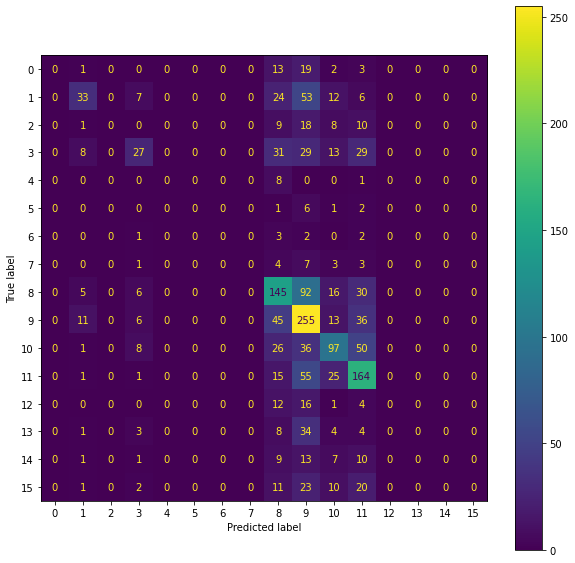

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logit_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#train data classification report
print('Train data classification report \n ',classification_report(y_train,logit_model.predict(X_train),target_names=le.inverse_transform([i for i in range(16)])))

Train data classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.56      0.28      0.38       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.71      0.36      0.48       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.51      0.60      0.55      1176
        INFP       0.44      0.80      0.57      1466
        INTJ       0.55      0.55      0.55       873
        INTP       0.48      0.66      0.55      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.83      0.02      0.04       270

    accuracy                           0.49 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#test data classification report
print('Test data classification report \n',classification_report(y_test,logit_model.predict(X_test),target_names=le.inverse_transform([i for i in range(16)])))

Test data classification report 
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.52      0.24      0.33       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.43      0.20      0.27       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.40      0.49      0.44       294
        INFP       0.39      0.70      0.50       366
        INTJ       0.46      0.44      0.45       218
        INTP       0.44      0.63      0.52       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.42   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models_acc['Logistic Regression']=accuracy_score(y_test,logit_model.predict(X_test))

# 2. Multinomial Naive Bayes

In [ ]:
#fitting the model over train data
Multinomial_NB=MultinomialNB()
Multinomial_NB.fit(X_train,y_train)
#predictions for test data
y_pred=Multinomial_NB.predict(X_test)

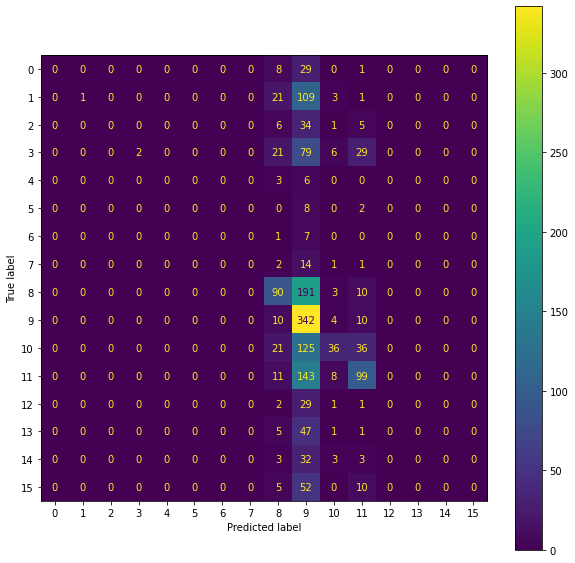

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=Multinomial_NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Multinomial_NB.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#train data classification report
print('Train data classification report \n ',classification_report(y_train,Multinomial_NB.predict(X_train),target_names=le.inverse_transform([i for i in range(16)])))

Train data classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.67      0.01      0.01       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.87      0.06      0.12       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.47      0.34      0.40      1176
        INFP       0.28      0.94      0.44      1466
        INTJ       0.70      0.25      0.37       873
        INTP       0.48      0.41      0.44      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.36 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#test data classification report
print('Test data classification report \n',classification_report(y_test,Multinomial_NB.predict(X_test),target_names=le.inverse_transform([i for i in range(16)])))

Test data classification report 
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       1.00      0.01      0.01       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       1.00      0.01      0.03       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.43      0.31      0.36       294
        INFP       0.27      0.93      0.42       366
        INTJ       0.54      0.17      0.25       218
        INTP       0.47      0.38      0.42       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.33   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models_acc['Multinomial Naive Bayes']=accuracy_score(y_test,Multinomial_NB.predict(X_test))

# 3. Decision Tree

In [ ]:
#fitting the model over train data
DT_model=DecisionTreeClassifier(max_depth=10)
DT_model.fit(X_train,y_train)
#predictions for test data
y_pred=DT_model.predict(X_test)

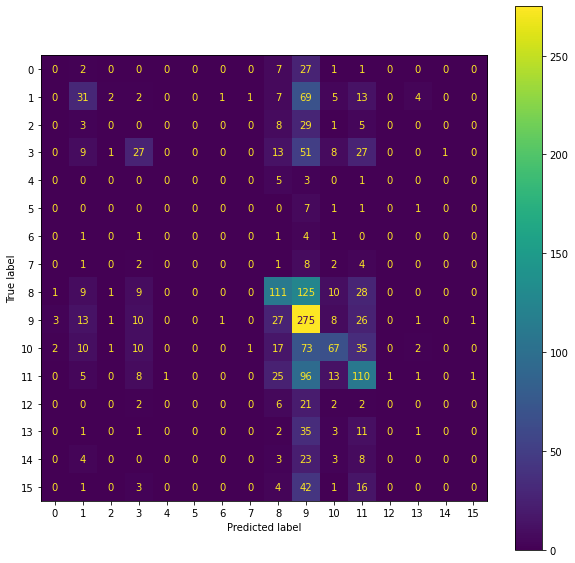

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=DT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#train data classification report
print('Train data classification report \n ',classification_report(y_train,DT_model.predict(X_train),target_names=le.inverse_transform([i for i in range(16)])))

Train data classification report 
                precision    recall  f1-score   support

        ENFJ       0.60      0.10      0.17       152
        ENFP       0.67      0.44      0.53       540
        ENTJ       0.88      0.12      0.22       185
        ENTP       0.84      0.50      0.63       548
        ESFJ       0.86      0.18      0.30        33
        ESFP       0.60      0.08      0.14        38
        ESTJ       1.00      0.06      0.12        31
        ESTP       0.89      0.11      0.20        71
        INFJ       0.66      0.52      0.58      1176
        INFP       0.37      0.88      0.52      1466
        INTJ       0.77      0.54      0.63       873
        INTP       0.55      0.59      0.57      1043
        ISFJ       0.57      0.03      0.06       133
        ISFP       0.78      0.06      0.12       217
        ISTJ       1.00      0.07      0.13       164
        ISTP       0.75      0.04      0.08       270

    accuracy                           0.52 

In [ ]:
#test data classification report
print('Test data classification report \n',classification_report(y_test,DT_model.predict(X_test),target_names=le.inverse_transform([i for i in range(16)])))

Test data classification report 
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.34      0.23      0.28       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.36      0.20      0.25       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.47      0.38      0.42       294
        INFP       0.31      0.75      0.44       366
        INTJ       0.53      0.31      0.39       218
        INTP       0.38      0.42      0.40       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.10      0.02      0.03        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.36   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models_acc['Decision Tree']=accuracy_score(y_test,DT_model.predict(X_test))

# 4. Random Forest

In [ ]:
#fitting the model over train data
RF_model=RandomForestClassifier(n_estimators=200, max_depth=12)
RF_model.fit(X_train,y_train)
#predictions for test data
y_pred=RF_model.predict(X_test)

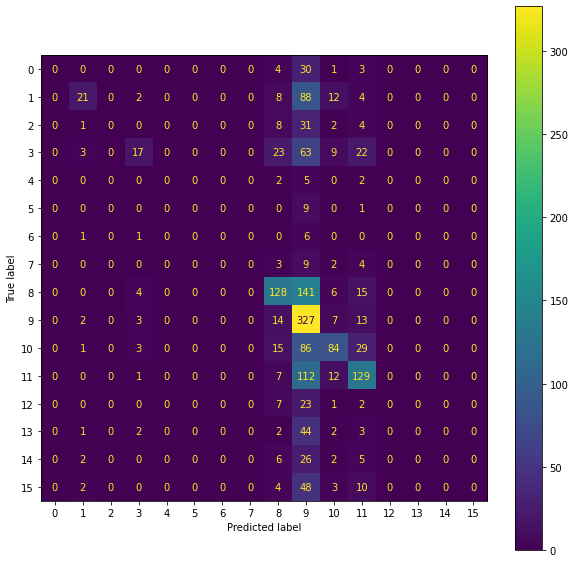

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=RF_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#train data classification report
print('Train data classification report \n ',classification_report(y_train,RF_model.predict(X_train),target_names=le.inverse_transform([i for i in range(16)])))

Train data classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.11      0.19       152
        ENFP       0.98      0.54      0.70       540
        ENTJ       1.00      0.27      0.43       185
        ENTP       0.97      0.67      0.79       548
        ESFJ       1.00      0.15      0.26        33
        ESFP       1.00      0.11      0.19        38
        ESTJ       1.00      0.13      0.23        31
        ESTP       1.00      0.10      0.18        71
        INFJ       0.92      0.86      0.89      1176
        INFP       0.48      1.00      0.65      1466
        INTJ       0.93      0.85      0.89       873
        INTP       0.85      0.87      0.86      1043
        ISFJ       1.00      0.07      0.13       133
        ISFP       1.00      0.13      0.23       217
        ISTJ       1.00      0.21      0.35       164
        ISTP       1.00      0.36      0.53       270

    accuracy                           0.73 

In [ ]:
#test data classification report
print('Test data classification report \n',classification_report(y_test,RF_model.predict(X_test),target_names=le.inverse_transform([i for i in range(16)])))

Test data classification report 
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.62      0.16      0.25       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.52      0.12      0.20       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.55      0.44      0.49       294
        INFP       0.31      0.89      0.46       366
        INTJ       0.59      0.39      0.47       218
        INTP       0.52      0.49      0.51       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.41   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models_acc['Random Forest']=accuracy_score(y_test,RF_model.predict(X_test))

In [ ]:
le.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

# 5. Support Vector Machine

In [ ]:
#fitting model over training data
weights ={0: 100,1: 100,2: 100,3: 100,4: 100,5: 100,6: 100,7: 100,8: 1,9: 1,10: 1,11: 1,12: 100,13: 100,14: 100,15:100}
model_svc=SVC(C=100,class_weight=weights)
model_svc.fit(X_train,y_train)
#predictions for test data
y_pred=model_svc.predict(X_test)

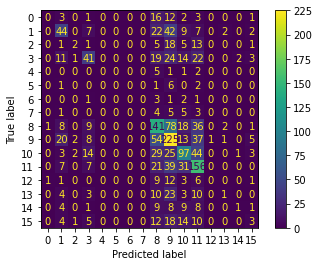

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#train data classification report
print('Train data classification report \n ',classification_report(y_train,model_svc.predict(X_train),target_names=le.inverse_transform([i for i in range(16)])))

Train data classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.99      0.99       152
        ENFP       0.89      1.00      0.94       540
        ENTJ       1.00      0.98      0.99       185
        ENTP       1.00      0.98      0.99       548
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      0.97      0.99        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      0.99      0.99      1176
        INFP       1.00      0.99      0.99      1466
        INTJ       1.00      0.99      1.00       873
        INTP       1.00      0.99      1.00      1043
        ISFJ       1.00      0.99      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      0.99      0.99       270

    accuracy                           0.99 

In [ ]:
#test data classification report
print('Test data classification report \n',classification_report(y_test,model_svc.predict(X_test),target_names=le.inverse_transform([i for i in range(16)])))

Test data classification report 
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.39      0.33      0.36       135
        ENTJ       0.25      0.04      0.07        46
        ENTP       0.42      0.30      0.35       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.39      0.48      0.43       294
        INFP       0.42      0.61      0.50       366
        INTJ       0.43      0.44      0.44       218
        INTP       0.43      0.60      0.50       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.17      0.02      0.03        54
        ISTJ       0.25      0.02      0.04        41
        ISTP       0.14      0.04      0.07        67

    accuracy                           0.41   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models_acc['SVM']=accuracy_score(y_test,model_svc.predict(X_test))

# Hyperparamter Tuning for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
#define parameter grid
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear","poly","rbf","sigmoid"]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv = 5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.212 total time=  14.8s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.211 total time=  13.9s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.211 total time=  13.8s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.211 total time=  13.9s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.211 total time=  13.9s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.212 total time=  18.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.211 total time=  18.3s
[CV 3/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.211 total time=  18.6s
[CV 4/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.211 total time=  18.3s
[CV 5/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.211 total time=  18.1s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.212 total time=  20.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
#print best parameter combination
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)
 
#classification report after hyper parameter tuning
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.47      0.24      0.32       135
           2       0.00      0.00      0.00        46
           3       0.52      0.23      0.32       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.38      0.43      0.40       294
           9       0.37      0.71      0.49       366
          10       0.49      0.41      0.45       218
          11       0.41      0.62      0.50       261
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        54
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00        67

    accuracy                           0.40      1735
   macro avg       0.17   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
model_svc_grid=SVC(C=1,gamma=1)
model_svc_grid.fit(X_train,y_train)
#predictions for test data
y_pred=model_svc_grid.predict(X_test)

In [ ]:
models_acc['SVM Post Hyperparameter Tuning']=accuracy_score(y_test,model_svc_grid.predict(X_test))

# Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid = {'C': [0.001,10, 100,1.0,0.1,0.01],
'solver': ['newton-cg','lbfgs','liblinear','saga'],
'penalty': ['l2','l1','elasticnet']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)  

In [ ]:
grid_result_predictions = grid.predict(X_test)
#classification report after hyper parameter tuning
print(classification_report(y_test, grid_result_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.47      0.32      0.38       135
           2       0.00      0.00      0.00        46
           3       0.46      0.26      0.33       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.42      0.49      0.45       294
           9       0.40      0.70      0.51       366
          10       0.45      0.49      0.47       218
          11       0.46      0.62      0.53       261
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        54
          14       0.00      0.00      0.00        41
          15       0.25      0.01      0.03        67

    accuracy                           0.43      1735
   macro avg       0.18   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
model_grid_LR=LogisticRegression(C=1.0, penalty='l1', solver='saga')
model_grid_LR.fit(X_train,y_train)
#predictions for test data
y_pred=model_grid_LR.predict(X_test)

In [ ]:
models_acc['Logit Model Post Hyperparameter Tuning']=accuracy_score(y_test,model_grid_LR.predict(X_test))

In [ ]:
acc=pd.DataFrame(models_acc.items(),columns=['Models','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens')

,Models,Test accuracy
0,Logit Model Post Hyperparameter Tuning,0.425360
1,Logistic Regression,0.415562
2,Random Forest,0.410951
3,SVM,0.409798
4,SVM Post Hyperparameter Tuning,0.404035
5,Decision Tree,0.353890
6,Multinomial Naive Bayes,0.328530


# Classification across MBTI axis

# Data Preprocessing/Cleaning

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
lemmatiser = WordNetLemmatizer()
useless_words = stopwords.words("english")
# Remove MBTI types from posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

#Binarizing the MBTI types
binarize_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
binarize_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [binarize_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += binarize_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in mbti_df.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
#Data cleaning
def clean_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  for row in data.iterrows():
      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      #Transform mbti to binary vector
      type_labelized = translate_personality(row[1].type)
      list_personality.append(type_labelized)
      #Cleaned data temp is passed here
      list_posts.append(temp)

  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = clean_text(mbti_df, remove_stop_words=True, remove_mbti_profiles=True)

print("\nPosts before preprocessing:\n\n", mbti_df.posts[0])
print("\nPosts after preprocessing:\n\n", list_posts[0])
print("\nMBTI types before preprocessing:\n\n", mbti_df.type[0])
print("\nMBTI types after preprocessing:\n\n", list_personality[0])


Posts before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/201

In [17]:
#Vectorizing the posts using tf-idf
c = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

#Return document-term matrix
cnt = c.fit_transform(list_posts)
t = TfidfTransformer()
#Fit the idf vector and transform count matrix to a tf-idf representation
tfidf =  t.fit_transform(cnt).toarray()

In [ ]:
#Shape after vectorizing the posts
tfidf.shape

(8675, 595)

In [18]:
#4 axis along which we would make predictions
MBTI_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(MBTI_type)):
    print(MBTI_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [19]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: INFJ
Binarized MBTI 1st row: [0 0 0 0]


# Logistic Regression

In [ ]:
#creating a list to store accuracy of logistic regression model
models_acc_LR={}

In [ ]:
#Splitting the dataset into training and testing
X=tfidf
for l in range(len(MBTI_type)):
    
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    Logistic_model = LogisticRegression() 
    Logistic_model.fit(X_train, y_train)

    #Predictions on test data
    y_pred = Logistic_model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    models_acc_LR[MBTI_type[l]]=accuracy
    print("%s Accuracy: %.2f%%" % (MBTI_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 76.21%
NS: Intuition (N) – Sensing (S) Accuracy: 87.22%
FT: Feeling (F) - Thinking (T) Accuracy: 71.88%
JP: Judging (J) – Perceiving (P) Accuracy: 64.41%


In [ ]:
acc=pd.DataFrame(models_acc_LR.items(),columns=['Logistic Regression Model','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens')

,Logistic Regression Model,Test accuracy
0,NS: Intuition (N) – Sensing (S),0.872162
1,IE: Introversion (I) / Extroversion (E),0.762138
2,FT: Feeling (F) - Thinking (T),0.718826
3,JP: Judging (J) – Perceiving (P),0.644080


# Random Forest

In [ ]:
#creating a list to store accuracy of random forest model
models_acc_RF={}

In [ ]:
#Splitting the dataset into training and testing
X=tfidf
for l in range(len(MBTI_type)):
    
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    RF_model = RandomForestClassifier() 
    RF_model.fit(X_train, y_train)

    #Predictions on test data
    y_pred = RF_model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    models_acc_RF[MBTI_type[l]]=accuracy
    print("%s Accuracy: %.2f%%" % (MBTI_type[l], accuracy * 100.0))

In [ ]:
acc=pd.DataFrame(models_acc_RF.items(),columns=['Random Forest Model','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens')

,Random Forest Model,Test accuracy
0,NS: Intuition (N) – Sensing (S),0.872511
1,IE: Introversion (I) / Extroversion (E),0.766678
2,FT: Feeling (F) - Thinking (T),0.694377
3,JP: Judging (J) – Perceiving (P),0.630108


# SVM

In [ ]:
#creating a list to store accuracy of svm model
models_acc_SVM={}

In [ ]:
#Splitting the dataset into training and testing
X=tfidf
for l in range(len(MBTI_type)):
    
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    SVM_model = SVC(random_state = 1, probability=True)
    SVM_model.fit(X_train, y_train)

    #Predictions on test data
    y_pred = SVM_model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    if l==1:
      y_pred_prob2 = SVM_model.predict_proba(X_test)[:,1]
      fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    models_acc_SVM[MBTI_type[l]]=accuracy
    print("%s Accuracy: %.2f%%" % (MBTI_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.19%
NS: Intuition (N) – Sensing (S) Accuracy: 87.25%
FT: Feeling (F) - Thinking (T) Accuracy: 72.76%
JP: Judging (J) – Perceiving (P) Accuracy: 64.48%


In [ ]:
acc=pd.DataFrame(models_acc_SVM.items(),columns=['SVM Model','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens')

,SVM Model,Test accuracy
0,NS: Intuition (N) – Sensing (S),0.872511
1,IE: Introversion (I) / Extroversion (E),0.771918
2,FT: Feeling (F) - Thinking (T),0.727559
3,JP: Judging (J) – Perceiving (P),0.644778


# Logistic Regression with Elastic Net Penalty factor

In [ ]:
#creating a list to store accuracy of logistic regression with elastic net model
models_acc_LREN={}

In [ ]:
#Splitting the dataset into training and testing
X=tfidf
for l in range(len(MBTI_type)):
    
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    LREN_model = LogisticRegressionCV(cv=8, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga') 
    LREN_model.fit(X_train, y_train)

    #Predictions on test data
    y_pred = LREN_model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    models_acc_LREN[MBTI_type[l]]=accuracy
    print("%s Accuracy: %.2f%%" % (MBTI_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.12%
NS: Intuition (N) – Sensing (S) Accuracy: 87.25%
FT: Feeling (F) - Thinking (T) Accuracy: 72.13%
JP: Judging (J) – Perceiving (P) Accuracy: 64.06%


In [ ]:
acc=pd.DataFrame(models_acc_LREN.items(),columns=['Elastic Net Model','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Elastic Net Model,Test accuracy
0,NS: Intuition (N) – Sensing (S),0.872511
1,IE: Introversion (I) / Extroversion (E),0.771219
2,FT: Feeling (F) - Thinking (T),0.721271
3,JP: Judging (J) – Perceiving (P),0.640587


# XGB

In [ ]:
#creating a list to store accuracy of xgb model
models_acc_XGB={}

In [ ]:
#creating dictionary for parameters
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2


for l in range(len(MBTI_type)):
    
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #fit model on training data
    model_xgb = XGBClassifier(**param)
    model_xgb.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model_xgb.predict(X_test)
    predictions = [round(value) for value in y_pred]
    if l==0:
      y_pred_prob1 = model_xgb.predict_proba(X_test)[:,1]
      fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
    elif l==2:
      y_pred_prob3 = model_xgb.predict_proba(X_test)[:,1]
      fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
    elif l==3:
      y_pred_prob4 = model_xgb.predict_proba(X_test)[:,1]
      fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    models_acc_XGB[MBTI_type[l]]=accuracy
    print("%s Accuracy: %.2f%%" % (MBTI_type[l], accuracy * 100.0))

In [ ]:
acc=pd.DataFrame(models_acc_XGB.items(),columns=['XGB Model','Test accuracy'])

In [ ]:
#summary of model accuracy
acc.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens')

,XGB Model,Test accuracy
0,NS: Intuition (N) – Sensing (S),0.866923
1,IE: Introversion (I) / Extroversion (E),0.789032
2,FT: Feeling (F) - Thinking (T),0.740133
3,JP: Judging (J) – Perceiving (P),0.680754


In [ ]:
len(MBTI_type)

4

# ROC Curve

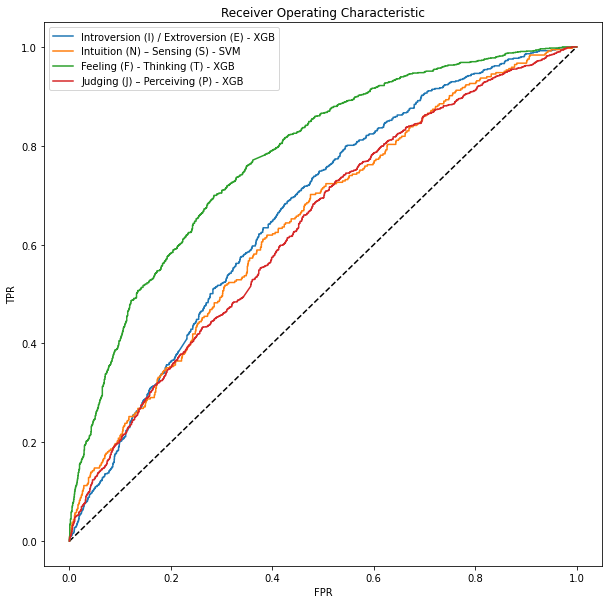

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Introversion (I) / Extroversion (E) - XGB")
plt.plot(fpr2, tpr2, label= "Intuition (N) – Sensing (S) - SVM")
plt.plot(fpr3, tpr3, label= "Feeling (F) - Thinking (T) - XGB")
plt.plot(fpr4, tpr4, label= "Judging (J) – Perceiving (P) - XGB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# Predicting one's own MBTI

## Post #1

In [ ]:
#random post to input to the model to predict its MBTI type
my_post  = """
During the onboarding of my internship, there were a lot of people from various cities. 
The experience was pretty intimidating and nerve wracking as there were students from colleges all over the country.
At the same time, it was interesting to meet people from various backgrounds and academic qualifications. 
There were various ideas and perspectives brought to the table during discussions.
Although it was my first time experiencing a meeting like this, I was excited and looked forward to the learnings and encounters with different personalities
"""
#declaring my own post of type ISFP to check what the model predicts
my_data = pd.DataFrame(data={'type': ['ISFP'], 'posts': [my_post]})

my_post, dummy  = clean_text(my_data, remove_stop_words=True)

my_cnt = c.transform(my_post)
my_tfidf =  t.transform(my_cnt).toarray()

In [ ]:
#setting up parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
X=tfidf
result = []
#training the model
for l in range(len(MBTI_type)):
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model_xgbfinal = XGBClassifier(**param)
    model_xgbfinal.fit(X_train, y_train)
    y_pred = model_xgbfinal.predict(my_tfidf)
    result.append(y_pred[0])

In [ ]:
#model prediction for my own post
print("Your MBTI type is ", translate_back(result))

Your MBTI type is  INFP


The model predicts the MBTI type of my own post as "INFP". I had declared my MBTI type as "ISFP", and the model prediction only changes accros one axis - Intuition (N) – Sensing (S).

## Post #2

In [27]:
#random post to input to the model to predict its MBTI type
my_post2  = """
Hi, I recently went for a hike where I met some other trekkers. 
They were quite sociable, and I actually had great time interacting.
We spoke at length on new camping spots and discussed new movies. 
I thrive off such good experiences and interactions as I love meeting new people and sharing ideas and thoughts. 
I am sure engaging with new people helps to expand your social circle and build many acquaintances. 
It is actually one of my favortie things to do.
"""
#declaring my own post of type ISFP to check what the model predicts
my_data = pd.DataFrame(data={'type': ['ESTP'], 'posts': [my_post2]})

my_post2, dummy  = clean_text(my_data, remove_stop_words=True)

my_cnt = c.transform(my_post2)
my_tfidf =  t.transform(my_cnt).toarray()

In [28]:
#predicting using SVM model
X=tfidf
result2 = []
#training the model
for l in range(len(MBTI_type)):
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    SVM_model = SVC(random_state = 1, probability=True)
    SVM_model.fit(X_train, y_train)
    y_pred = SVM_model.predict(my_tfidf)
    result2.append(y_pred[0])

In [29]:
#model prediction for my own post
print("Your MBTI type is ", translate_back(result2))

Your MBTI type is  INFP


## Post #3

In [90]:
#random post to input to the model to predict its MBTI type
my_post3  = """
Music Festivals lack direction and have strange lights which makes it difficult to drive.
One should take care when driving among crazy , and hazy confusion . It is all chaos and we should take care and avoid harm and pay attention to help escape
Sometime fights break out , wrists are broken and affects mental state of mind. We should not make seeming mistakes, and attempt to help passing people and show that we care
Keeping mouth shut is not good. People are apprehensive about helping. But these thoughts are not healthty. Caring is not social stigma
These issues are real and failed attempts to protect others seem like mistakes     
"""
#declaring my own post of type ISFP to check what the model predicts
my_data = pd.DataFrame(data={'type': ['ISTP'], 'posts': [my_post3]})

my_post3, dummy  = clean_text(my_data, remove_stop_words=True)

my_cnt = c.transform(my_post3)
my_tfidf =  t.transform(my_cnt).toarray()

In [91]:
#setting up parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
X=tfidf
result3 = []
#training the model
for l in range(len(MBTI_type)):
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model_xgbfinal = XGBClassifier(**param)
    model_xgbfinal.fit(X_train, y_train)
    y_pred = model_xgbfinal.predict(my_tfidf)
    result3.append(y_pred[0])

In [92]:
#model prediction for my own post
print("Your MBTI type is ", translate_back(result3))

Your MBTI type is  INTP


## Post #4

In [78]:
#random post to input to the model to predict its MBTI type
my_post4  = """
I believe one should be full of purpose and have the drive to execute with the best quality 
Sometimes you should try to learn a little bit about every topic ||| You can't get bogged down in the details 
Apart from work listen to songs , be witty , tell really bad jokes , outgoing , social , imaginative , intellectual , get into relationships, tune into each other's moods, have easy communications
Do cool things and be charming ||| Like I make my own music or make up my own songs just because it is fun ||| Understand your own actions ,
stay adaptable and  know exactly how to speak/act around certain people
My Fe is pretty developed, to some extent, at the least. Although I have a tendency to be a bit too apathetic to other's feelings  
I like expressing my feelings and understand other people's emothions.
"""
#declaring my own post of type ISFP to check what the model predicts
my_data = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_post4]})

my_post4, dummy  = clean_text(my_data, remove_stop_words=True)

my_cnt = c.transform(my_post4)
my_tfidf =  t.transform(my_cnt).toarray()

In [79]:
#setting up parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
X=tfidf
result4 = []
#training the model
for l in range(len(MBTI_type)):
    Y = list_personality[:,l]
    seed = 2
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model_xgbfinal = XGBClassifier(**param)
    model_xgbfinal.fit(X_train, y_train)
    y_pred = model_xgbfinal.predict(my_tfidf)
    result4.append(y_pred[0])

In [80]:
#model prediction for my own post
print("Your MBTI type is ", translate_back(result4))

Your MBTI type is  INFJ
